<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [93]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline


# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [94]:
scores =[]
with open('sat_scores.csv', 'r') as f:
    rows = f.read().splitlines()
    scores = [x.split(',') for x in rows]
print(scores) 


[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [95]:
sat_scores = []
for line in scores:
    sat_score = []
    for item in line:
        if item.isnumeric() == True:
            sat_score.append(float(item))
        else:
            sat_score.append(item)
       
    sat_scores.append(sat_score)
print(sat_scores)           

[['State', 'Rate', 'Verbal', 'Math'], ['CT', 82.0, 509.0, 510.0], ['NJ', 81.0, 499.0, 513.0], ['MA', 79.0, 511.0, 515.0], ['NY', 77.0, 495.0, 505.0], ['NH', 72.0, 520.0, 516.0], ['RI', 71.0, 501.0, 499.0], ['PA', 71.0, 500.0, 499.0], ['VT', 69.0, 511.0, 506.0], ['ME', 69.0, 506.0, 500.0], ['VA', 68.0, 510.0, 501.0], ['DE', 67.0, 501.0, 499.0], ['MD', 65.0, 508.0, 510.0], ['NC', 65.0, 493.0, 499.0], ['GA', 63.0, 491.0, 489.0], ['IN', 60.0, 499.0, 501.0], ['SC', 57.0, 486.0, 488.0], ['DC', 56.0, 482.0, 474.0], ['OR', 55.0, 526.0, 526.0], ['FL', 54.0, 498.0, 499.0], ['WA', 53.0, 527.0, 527.0], ['TX', 53.0, 493.0, 499.0], ['HI', 52.0, 485.0, 515.0], ['AK', 51.0, 514.0, 510.0], ['CA', 51.0, 498.0, 517.0], ['AZ', 34.0, 523.0, 525.0], ['NV', 33.0, 509.0, 515.0], ['CO', 31.0, 539.0, 542.0], ['OH', 26.0, 534.0, 439.0], ['MT', 23.0, 539.0, 539.0], ['WV', 18.0, 527.0, 512.0], ['ID', 17.0, 543.0, 542.0], ['TN', 13.0, 562.0, 553.0], ['NM', 13.0, 551.0, 542.0], ['IL', 12.0, 576.0, 589.0], ['KY', 12.

In [96]:
header = sat_scores[0]
data = sat_scores[1:]


score_final = {column_name:[d[index] for d in data] for index,column_name in enumerate(header)}
score_final

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82.0,
  81.0,
  79.0,
  77.0,
  72.0,
  71.0,
  71.0,
  69.0,
  69.0,
  68.0,
  67.0,
  65.0,
  65.0,
  63.0,
  60.0,
  57.0,
  56.0,
  55.0,
  54.0,
  53.0,
  53.0,
  52.0,
  51.0,
  51.0,
  34.0,
  33.0,
  31.0,
  26.0,
  23.0,
  18.0,
  17.0,
  13.0,
  13.0,
  12.0,
  12.0,
  11.0,
  11.0,
  9.0,
  9.0,
  9.0,
  8.0,
  8.0,
  8.0,
  7.0,
  6.0,
  6.0,
  5.0,
  5.0,
  4.0,
  4.0,
  4.0,
  45.0],
 'Verbal': [509.0,
  499.0,
  511.0,
  495.0,
  520.0,
  501.0,
  500.0,
  511.0,
  506.0,
  510.0,
  501.0,
  508.0,
  493.0,
  491.0,
  499.0,
  486.0,
  482.0,

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [97]:
df_sats = pd.DataFrame(score_final)
df_sats.head(5)
df_sats.dtypes

State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object

In [98]:
df = pd.read_csv('sat_scores.csv')
df.dtypes


State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

- Loading from file will returns all integer for rate, verbal and math.

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [99]:

df.index = df.index + 1
df.head(10)

,State,Rate,Verbal,Math
1,CT,82,509,510
2,NJ,81,499,513
3,MA,79,511,515
4,NY,77,495,505
5,NH,72,520,516
6,RI,71,501,499
7,PA,71,500,499
8,VT,69,511,506
9,ME,69,506,500
10,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [100]:
df_dict = pd.DataFrame(np.array([['object', 'int', 'int', 'int'],
                                 ['State Abbreviations for America', 'Participation Rate', 'Verbal Average score per state', 'Math Average score per state']],df.info())
                                ,columns = ['State', 'Rate', 'Verbal', 'Math'],index =['Variable Type', 'Description'])
                                                

df_dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


,State,Rate,Verbal,Math
Variable Type,object,int,int,int
Description,State Abbreviations for America,Participation Rate,Verbal Average score per state,Math Average score per state


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


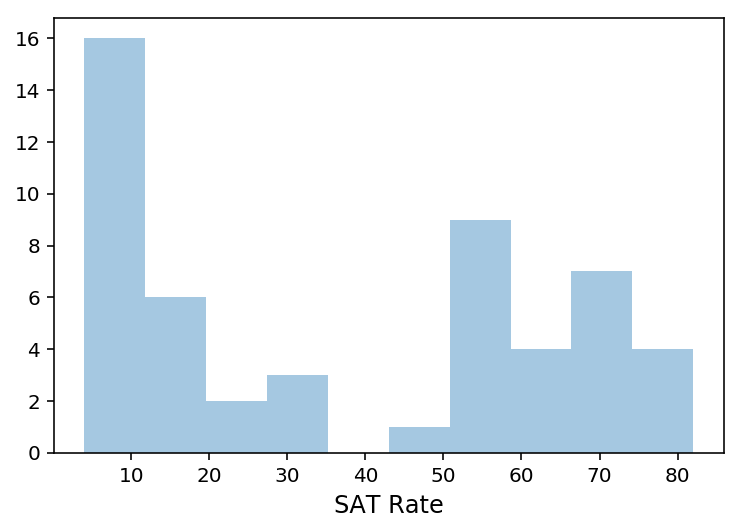

In [102]:

rate = pd.Series(df['Rate'], name= 'Rate')
rate_plot = sns.distplot(rate,kde=False,bins=10)
rate_plot.set_xlabel('SAT Rate', fontsize=12)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


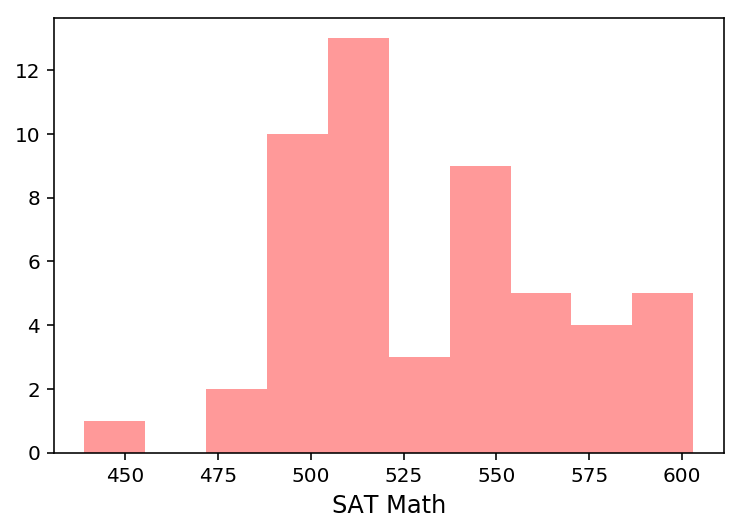

In [103]:

math = pd.Series(df['Math'], name= 'Math')
math_plot = sns.distplot(math,kde=False,bins=10, color='r')
math_plot.set_xlabel('SAT Math', fontsize=12)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


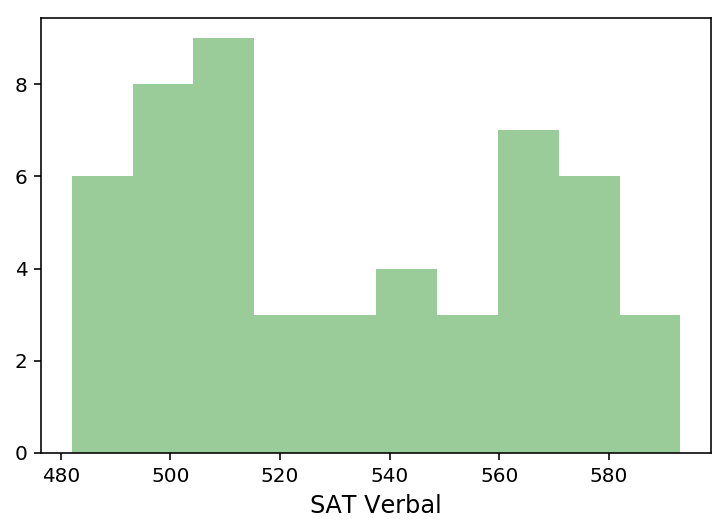

In [104]:

verbal = pd.Series(df['Verbal'], name= 'Verbal')
verbal_plot = sns.distplot(verbal,kde=False,bins=10,color='g')
verbal_plot.set_xlabel('SAT Verbal', fontsize=12)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

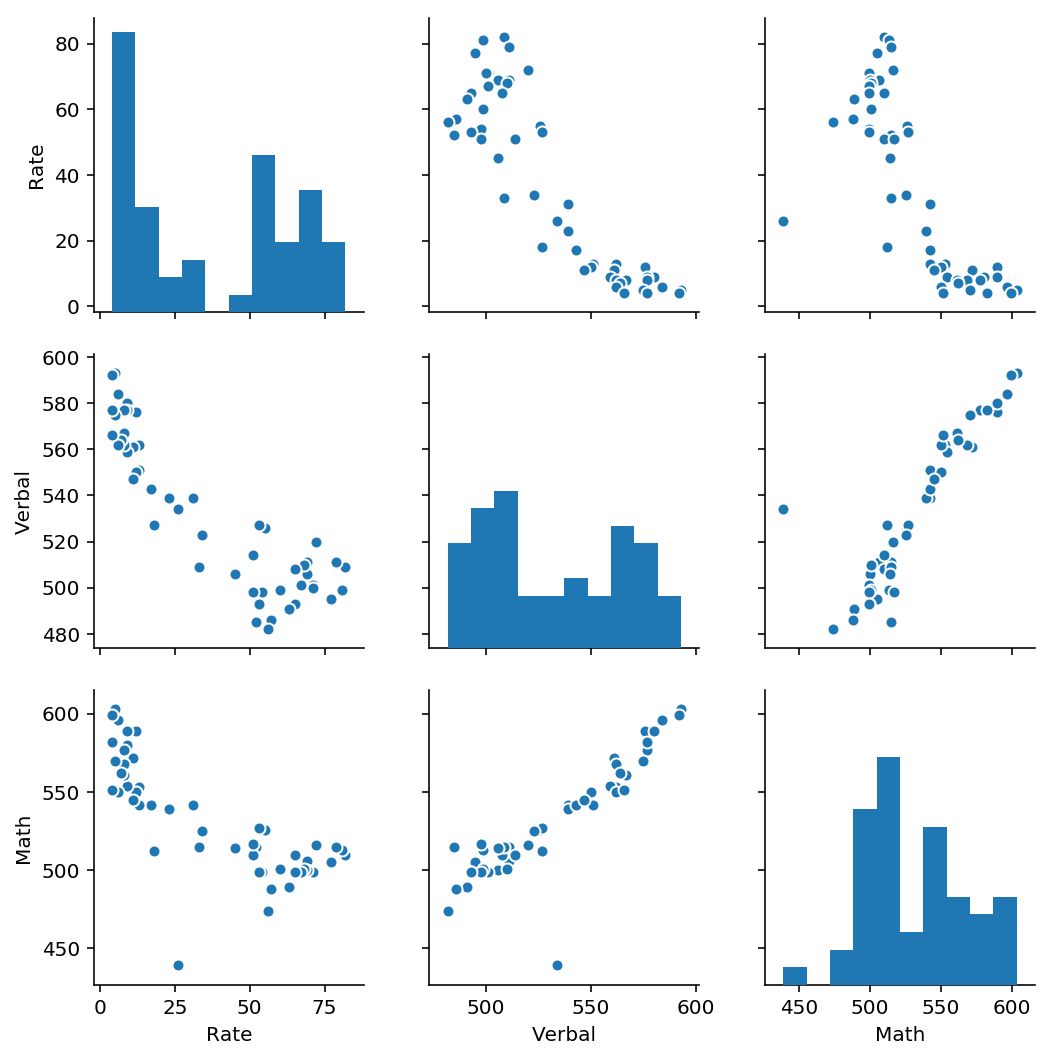

In [105]:
sns.pairplot(df)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

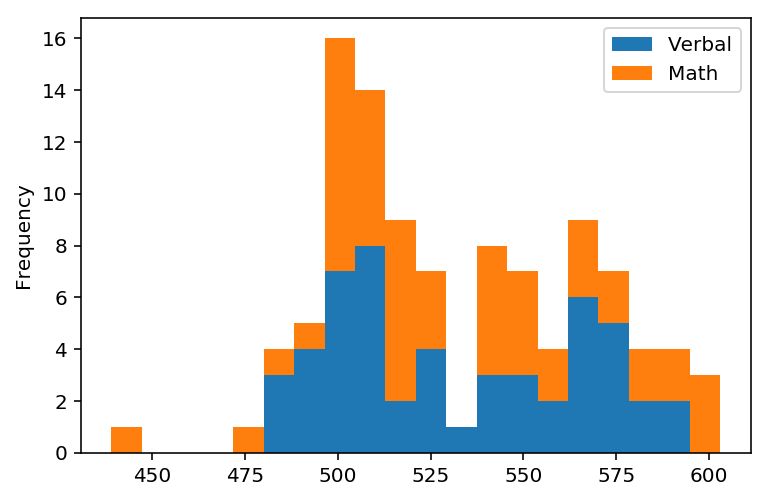

In [106]:
df[['Verbal', 'Math']].plot.hist(stacked=True, bins=20);


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

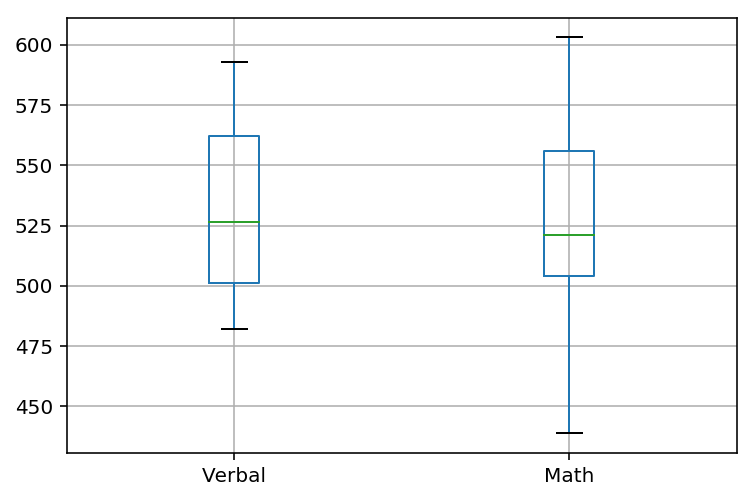

In [107]:
boxplot = df.boxplot(column=['Verbal','Math'])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


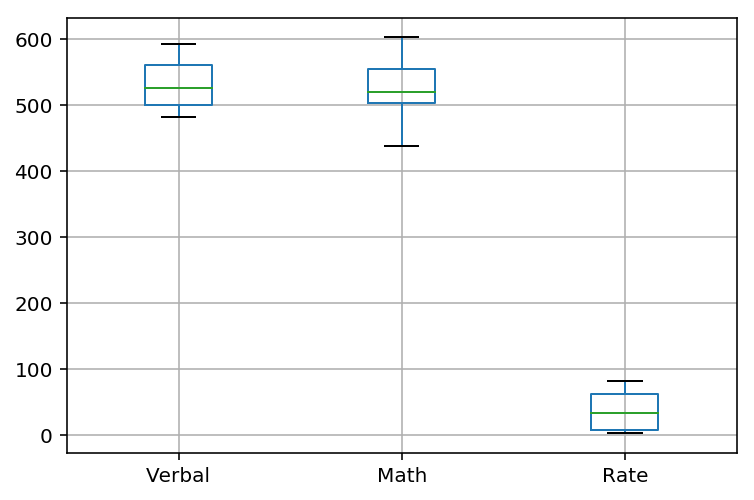

In [108]:
boxplot = df.boxplot(column=['Verbal','Math','Rate'])

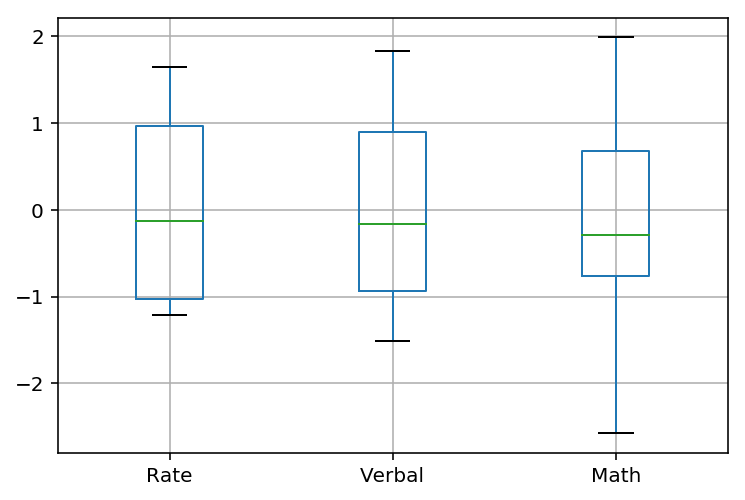

In [109]:
mask = df_sats.iloc[:,1:4]
df_stand = (mask - mask.mean()) / mask.std() #  This is to normalizing the data. 
df_stand.boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [110]:
df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [111]:

#Verbal_ave = df[['Verbal']].apply(np.mean, axis= 0)

print(len(df[df['Verbal'] > 532.02][['State']]))
print(df[df['Verbal'] > 532.02][['State']])


24
   State
27    CO
28    OH
29    MT
31    ID
32    TN
33    NM
34    IL
35    KY
36    WY
37    MI
38    MN
39    KS
40    AL
41    NE
42    OK
43    MO
44    LA
45    WI
46    AR
47    UT
48    IA
49    SD
50    ND
51    MS


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [112]:
print(len(df[df['Verbal'] > 526.5][['State']]))
print(df[df['Verbal'] > 526.5][['State']])

26
   State
20    WA
27    CO
28    OH
29    MT
30    WV
31    ID
32    TN
33    NM
34    IL
35    KY
36    WY
37    MI
38    MN
39    KS
40    AL
41    NE
42    OK
43    MO
44    LA
45    WI
46    AR
47    UT
48    IA
49    SD
50    ND
51    MS


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [113]:
df['diff_verbal_math'] = df['Verbal'] - df['Math']

df['diff_math_verbal'] = df['Math'] - df['Verbal']
df.head()


,State,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal
1,CT,82,509,510,-1,1
2,NJ,81,499,513,-14,14
3,MA,79,511,515,-4,4
4,NY,77,495,505,-10,10
5,NH,72,520,516,4,-4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [114]:
mask_verbal = df['Verbal'] > df['Math']
verb_math_gap = df[mask_verbal].sort_values('diff_verbal_math',ascending = False).head()
verb_math_gap


,State,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal
28,OH,26,534,439,95,-95
30,WV,18,527,512,15,-15
51,MS,4,566,551,15,-15
46,AR,6,562,550,12,-12
32,TN,13,562,553,9,-9


In [115]:
mask_math = df['Math'] > df['Verbal']
math_verb_gap = df[mask_math].sort_values('diff_math_verbal',ascending = False).head()
math_verb_gap

,State,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal
22,HI,52,485,515,-30,30
24,CA,51,498,517,-19,19
2,NJ,81,499,513,-14,14
34,IL,12,576,589,-13,13
45,WI,6,584,596,-12,12


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [116]:
df.iloc[:, 1:4].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


-The correlation matrix shows that the rate has high negative correlation with Math and Verbal, which means that the state with high particiation likely to have low Math and Verbal scores.
-Verbal and Math has high postive correlation, which means the state with high Math score likely to have high Verbal score.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [117]:
df.describe()

,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231,-0.519231
std,27.301788,33.236225,36.014975,15.729939,15.729939
min,4.000000,482.000000,439.000000,-30.000000,-95.000000
25%,9.000000,501.000000,504.000000,-6.000000,-4.250000
50%,33.500000,526.500000,521.000000,0.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000,6.000000
max,82.000000,593.000000,603.000000,95.000000,30.000000


count = Number of rows
mean = Average of the elements
std = Standard deviation, measure of the spread of the elements
min = returns the min value
25% = 25th percentile
50% = median of the elements 
75% = 75th percentile
max = returns the max value


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [118]:
df.iloc[:, 1:4].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


1) Correlation is a scaled version of covariance.
The 2 parameters have the same signs.(ie. rate and verbal have negative correction, similarily for negative covariance)
Values of correlation take place between -1 and 1 but values of covariance take place between -∞ and + ∞

Covariance measures variables that have different units of measurement,
so its impossible to measure the degree to which the variables move together.
Whereas Correleation use a standard unit of measurement.




2) To find the correlation from covariance, divide the covariance of the 2 variables by the product of the standard deviation of the variables.


3) correlation is preferred over covariance, because it remains unaffected by the change in location and scale, and can also be used to make a comparison between two pairs of variables


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [137]:
drug = pd.read_csv('drug-use-by-age.csv')
drug.replace('-','0', inplace= True)

drug = pd.concat([drug.iloc[:, 0], drug.iloc[:,1:].apply(pd.to_numeric, errors='coerce')], axis= 1)
drug.head()




,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [120]:
subset_use = drug.loc[:, drug.columns.str.contains('use')]
subset_use.set_index(drug['age'], inplace= True)
subset_use.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,,,,,,,,,,,,,
12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


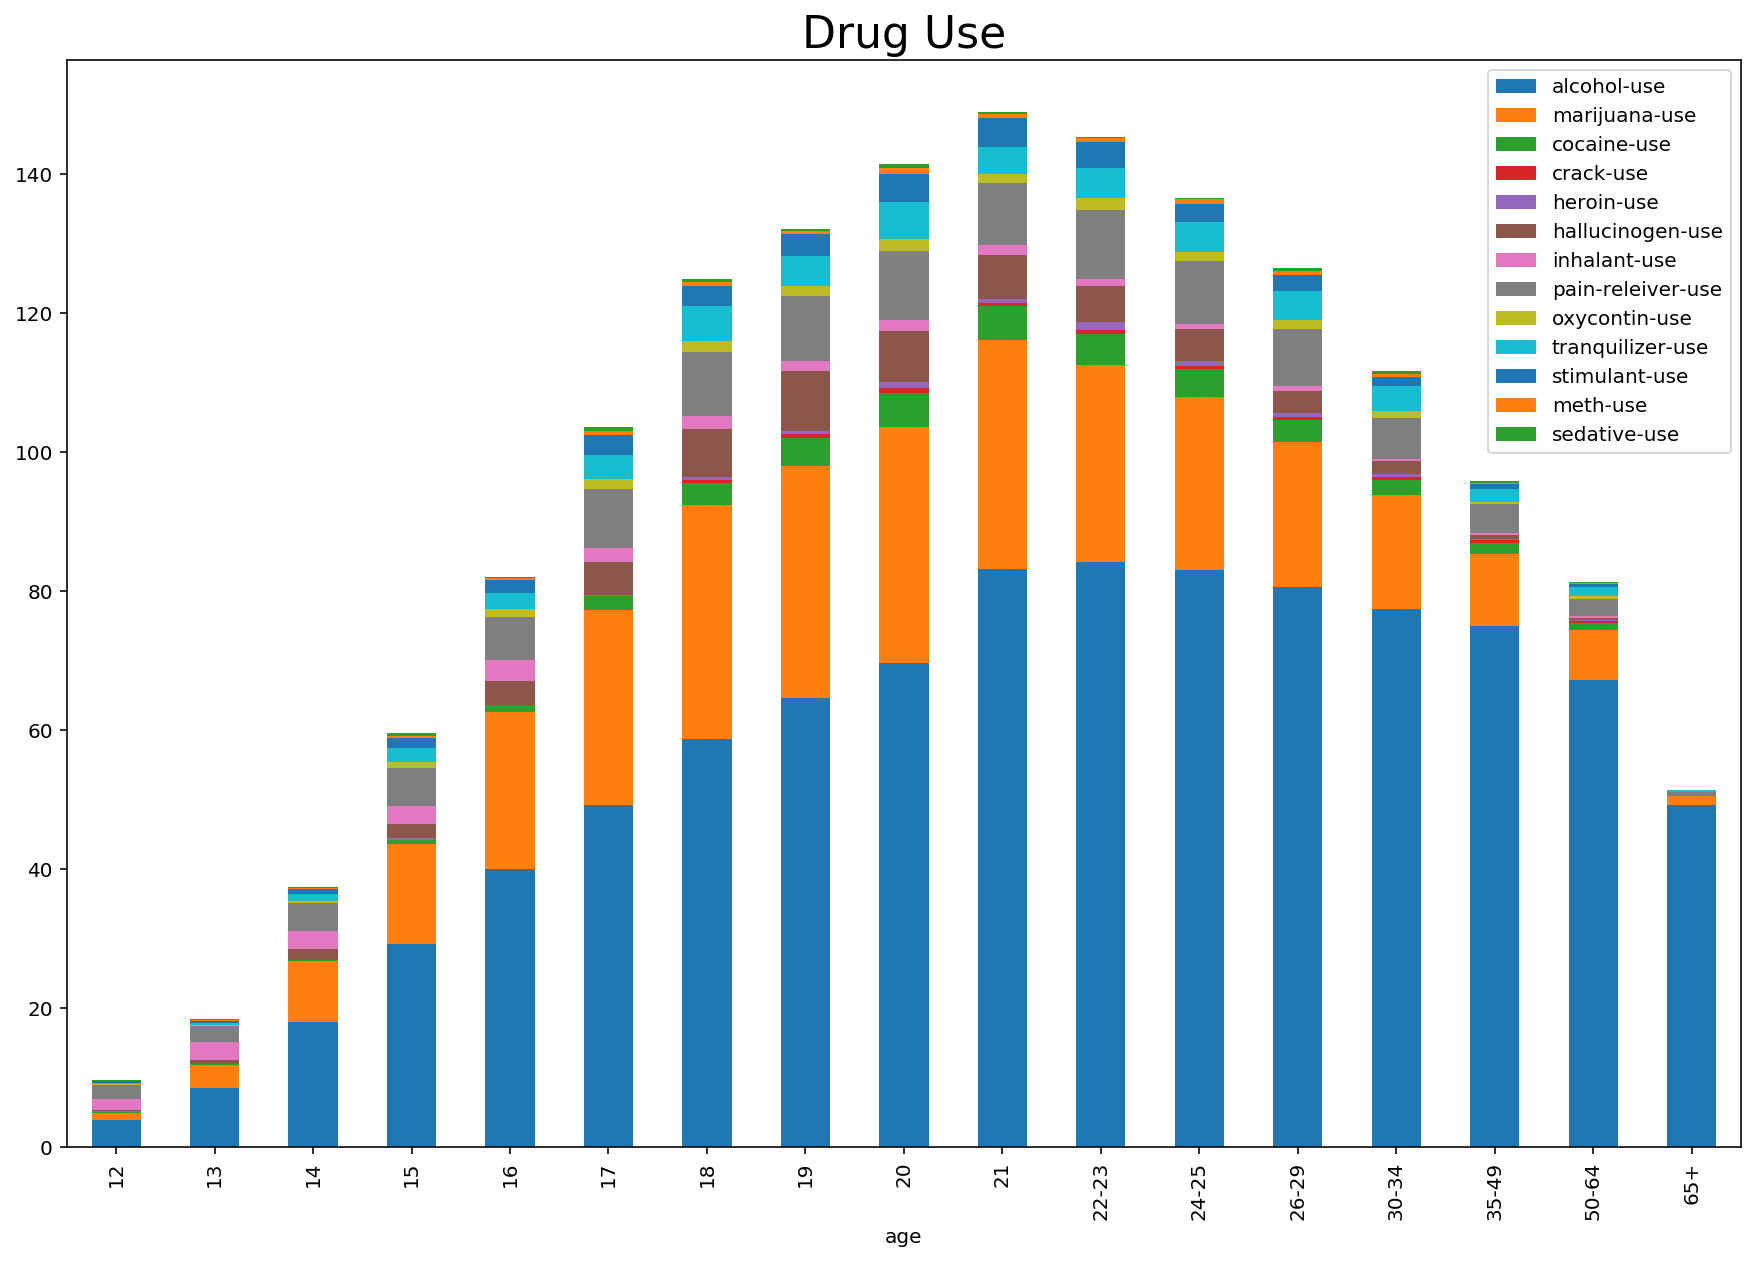

In [121]:
ax = subset_use.plot(kind='bar', figsize=(15,10), stacked=True)
ax.set_title('Drug Use', fontsize=22)
ax.legend(loc='best')

Alcohol appears to be the highest drug use across all ages, it peaked between ages 21-25. 
The second highest drug-use is marijuana, it peaked between 18-23 and slide down . It seems that this age between 18-21 highly consume both Alcohol and Marijuana.


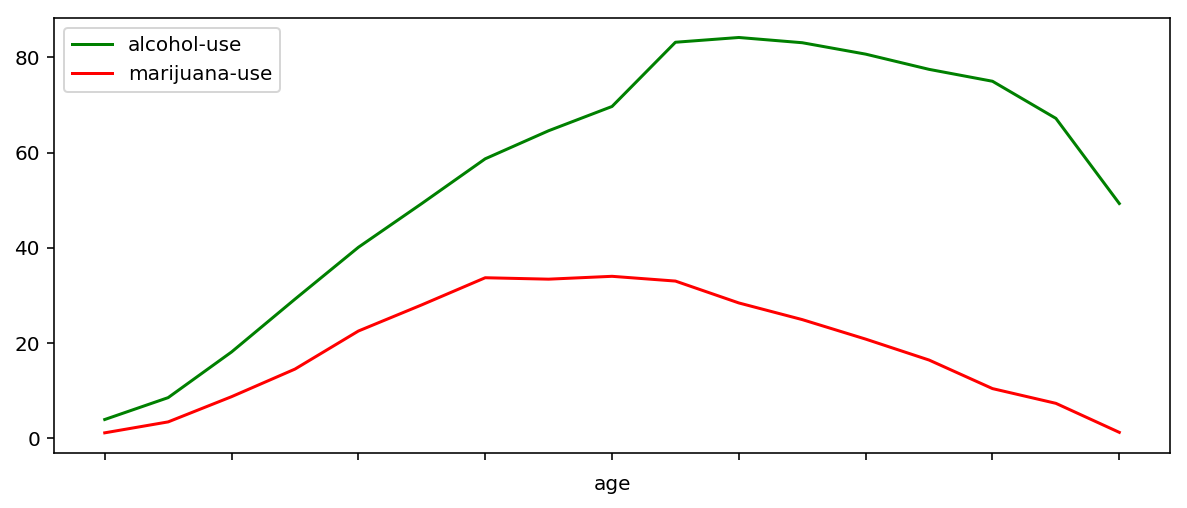

In [122]:
subset_use[['alcohol-use', 'marijuana-use']].plot(figsize=(10,4),  style={'alcohol-use': 'g', 'marijuana-use':'r'},use_index=True)
plt.show()

In [123]:
subset_use.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


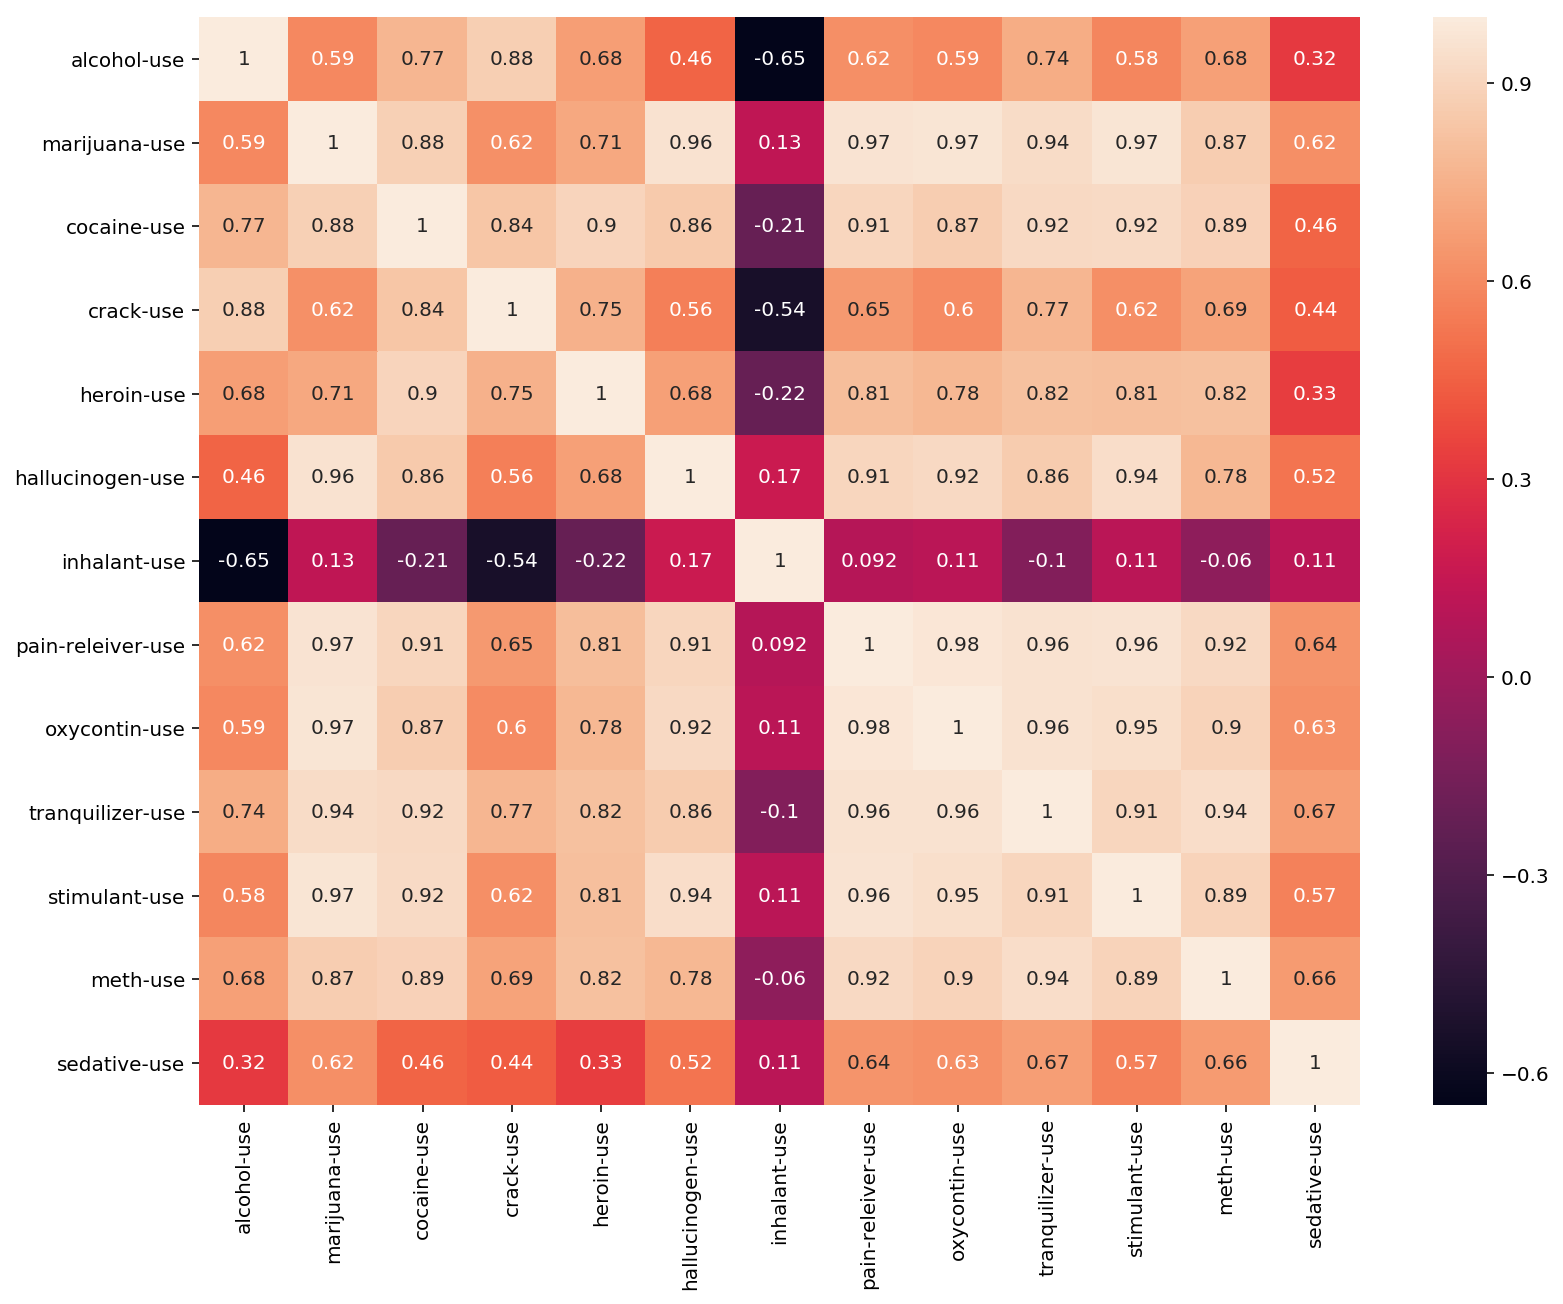

In [124]:

plt.figure(figsize=(13,10))
sns.heatmap(subset_use.corr(), annot=True)

- The 'Use' column shows the percentage of the age group who use that particular drug, however the the percentage adds up to more then 100%, which means we can assume that the people who consume alcohol may also took marijuana.

- Alcohol appears to be the highest drug use across all ages, it peaked between ages 21-25. The second highest drug-use is marijuana, it peaked between 18-23 and slide down . It seems that this age between 18-21 highly consume both Alcohol and Marijuana.

- oxycontin and pain-reliever drug has the highest correlation which makes sense because both drugs are to relieve pain.

- about 95% of people age 65+ consume alcohol then any other drugs.  

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [129]:

q1 = df.Verbal.quantile(0.25)
q3 = df.Verbal.quantile(0.75)
iqr = q3-q1 #Interquartile range
rate_low  = q1 - (1.5 *iqr)
rate_high = q3 + (1.5 * iqr)
df.loc[(df.Verbal < rate_low) & (df.Verbal > rate_high)]
# no outliers found

,State,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal


In [130]:

Q1 = df.Math.quantile(0.25)
Q3 = df.Math.quantile(0.75)
IQR = Q3-Q1 #Interquartile range
rate_lower  = Q1 - (1.5 *IQR)
rate_higher = Q3 + (1.5 * IQR)
rate_outlier = df.loc[(df.Math < rate_lower) & (df.Math > rate_higher)]
rate_outlier
#no outliers found


,State,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [131]:
df.Verbal.corr(df.Math,method='spearman')

0.9052048847940284

In [132]:
df.Verbal.corr(df.Math,method='pearson')

0.8998708525444292

- Find the ranks for each individual subject
- Create a new column to show the difference in the rank for both subjects(rank_diff)
- Create another column to squared the rank_diff(rank diff2)
- add up the all the numbers in (rank diff2) 
- Use this formula 
spearman correlation = 1 - (6 *sum(rank diff2))/ len(df.Verbal(len(df.Verbal)**2 - 1)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [133]:
df.Rate.corr(df.Math,method='spearman')

-0.8132750494861138

In [136]:
df['per_rate']= [stats.percentileofscore(df.Rate, a, 'rank') for a in df.Rate]
df.iloc[[23]]

,State,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal,per_rate
24,CA,51,498,517,-19,19,56.730769


- In order to calculate spearman rank correlation, we need to convert all the values into percentile ranks.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.